<a href="https://colab.research.google.com/github/ramisaarna/CSE475/blob/main/MLLAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset_dir = '/content/drive/MyDrive/MANGOLEAF/MangoLeafBD Dataset'
os.listdir(dataset_dir)


['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

Class distribution:
Anthracnose         500
Bacterial Canker    500
Cutting Weevil      500
Die Back            500
Gall Midge          500
Healthy             500
Powdery Mildew      500
Sooty Mould         500
Name: count, dtype: int64


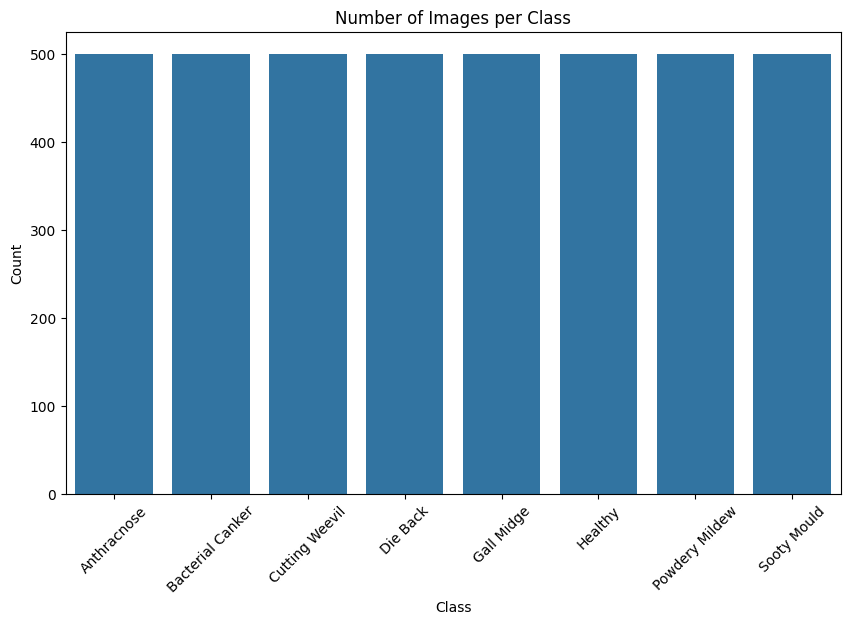

In [ ]:
# Check the number of images per class
class_counts = pd.Series(y).value_counts()
print("Class distribution:")
print(class_counts)

# Visualize the class distribution using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Ensure labels are encoded properly using LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # y is the original label array

# Check the unique classes and their corresponding labels
print("Classes and encoded labels:", list(zip(encoder.classes_, np.unique(y_encoded))))





Classes and encoded labels: [('Anthracnose', 0), ('Bacterial Canker', 1), ('Cutting Weevil', 2), ('Die Back', 3), ('Gall Midge', 4), ('Healthy', 5), ('Powdery Mildew', 6), ('Sooty Mould', 7)]


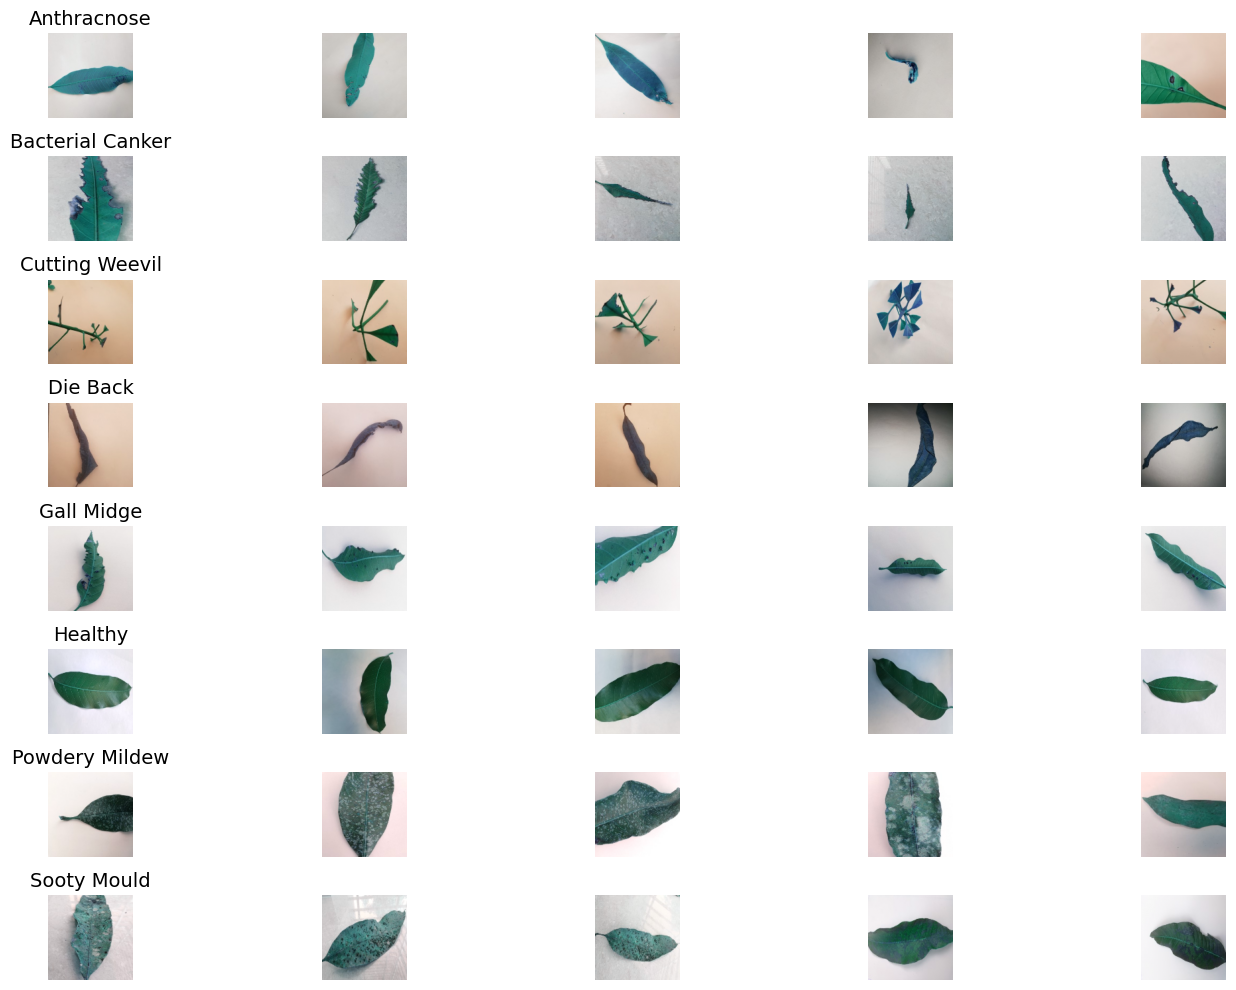

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_images_per_class(X, y_encoded, num_images=5):
    plt.figure(figsize=(15, 10))
    classes = encoder.classes_  # Get class names

    for i, class_name in enumerate(classes):
        # Get indices for the class (using encoded labels)
        class_index = encoder.transform([class_name])[0]  # Convert class name to encoded label
        class_indices = np.where(y_encoded == class_index)[0]  # Find indices where the label matches

        # Ensure that there are images to display for the class
        if len(class_indices) == 0:
            print(f"Warning: No images found for class '{class_name}'. Skipping.")
            continue

        # Randomly select 'num_images' indices
        selected_indices = np.random.choice(class_indices, num_images, replace=False)

        # Display selected images for the class
        for j, idx in enumerate(selected_indices):
            plt.subplot(len(classes), num_images, i * num_images + j + 1)
            plt.imshow(X[idx])
            plt.axis('off')
            if j == 0:
                plt.title(class_name, fontsize=14)

    plt.tight_layout()
    plt.show()

# Display 5 random images per class
plot_random_images_per_class(X, y_encoded)


In [ ]:
# Check for consistency in image dimensions
image_shapes = [img.shape for img in X]
shape_counts = pd.Series([str(shape) for shape in image_shapes]).value_counts()
print("Image shape distribution:")
print(shape_counts)

# If there are different shapes, you may want to resize all images


Image shape distribution:
(128, 128, 3)    4000
Name: count, dtype: int64


In [ ]:
def load_images_from_directory(directory, target_size=(128, 128)):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                img = cv2.imread(img_path)  # Read image
                img = cv2.resize(img, target_size)  # Resize image
                img = img / 255.0  # Normalize image (scale to [0, 1])
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

X, y = load_images_from_directory(dataset_dir)


In [ ]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} images")
print(f"Test set size: {X_test.shape[0]} images")


Training set size: 3200 images
Test set size: 800 images


In [ ]:
# Flatten the images for Random Forest and Decision Tree (from 3D to 2D)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

print(f"Shape of flattened training data: {X_train_flattened.shape}")
print(f"Shape of flattened test data: {X_test_flattened.shape}")




Shape of flattened training data: (3200, 49152)
Shape of flattened test data: (800, 49152)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flattened, y_train)

# Predictions on test data
y_pred_rf = rf_model.predict(X_test_flattened)

# Evaluate the model
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model Evaluation:
Accuracy: 0.86875
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       123
           1       0.83      0.90      0.86        86
           2       0.95      1.00      0.97       112
           3       0.93      0.96      0.95       101
           4       0.83      0.78      0.80       104
           5       0.82      0.89      0.86        90
           6       0.85      0.86      0.85        91
           7       0.76      0.71      0.73        93

    accuracy                           0.87       800
   macro avg       0.86      0.87      0.86       800
weighted avg       0.87      0.87      0.87       800



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_flattened, y_train)

# Predictions on test data
y_pred_dt = dt_model.predict(X_test_flattened)

# Evaluate the model
print("Decision Tree Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Model Evaluation:
Accuracy: 0.68875
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67       123
           1       0.71      0.71      0.71        86
           2       0.85      0.96      0.90       112
           3       0.82      0.88      0.85       101
           4       0.56      0.56      0.56       104
           5       0.64      0.69      0.66        90
           6       0.64      0.67      0.65        91
           7       0.48      0.37      0.41        93

    accuracy                           0.69       800
   macro avg       0.67      0.68      0.68       800
weighted avg       0.68      0.69      0.68       800



In [ ]:
# Comparison of Random Forest and Decision Tree accuracy
print("Comparison of Random Forest and Decision Tree:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")


Comparison of Random Forest and Decision Tree:
Random Forest Accuracy: 0.86875
Decision Tree Accuracy: 0.68875


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


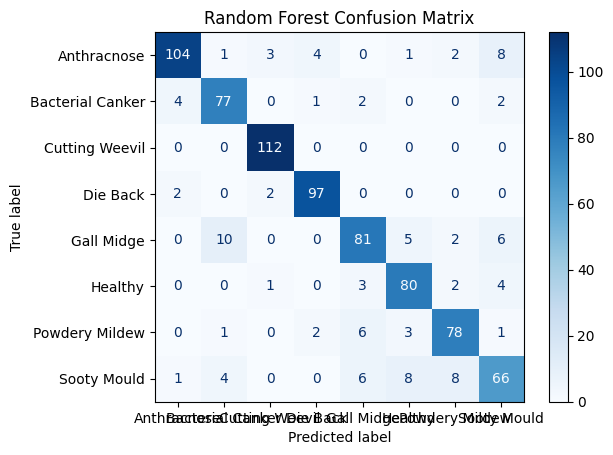

In [ ]:
# Calculate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=encoder.classes_)
disp_rf.plot(cmap='Blues', values_format='d')

plt.title("Random Forest Confusion Matrix")
plt.show()


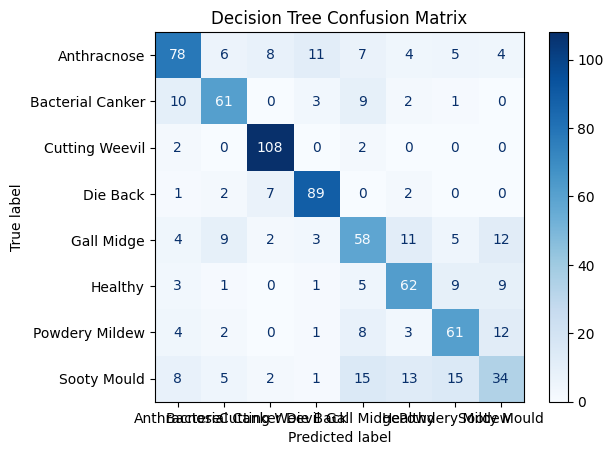

In [ ]:
# Calculate the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix for Decision Tree
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=encoder.classes_)
disp_dt.plot(cmap='Blues', values_format='d')

plt.title("Decision Tree Confusion Matrix")
plt.show()
